In this document we'll look at a wine dataset.

In [1]:
import pandas as pd
from dagger.graph import DAG
from dagger.query import Query
from dagger.common import quantize_column

In [12]:
df = (pd.read_csv("../data/wine_2012.csv")
      .assign(score=lambda d: quantize_column(d['score'], 4))
      .rename(lambda d: d.replace(".", "_"), axis="columns")
      [['judge', 'wine', 'score', 'wine_amer', 'judge_amer']])
df.head()

,judge,wine,score,wine_amer,judge_amer
0,Jean-M Cardebat,A1,1,1,0
1,Jean-M Cardebat,B1,2,1,0
2,Jean-M Cardebat,C1,3,0,0
3,Jean-M Cardebat,D1,3,0,0
4,Jean-M Cardebat,E1,1,1,0


In [13]:
df.score.value_counts()

3    80
2    44
4    37
1    19
Name: score, dtype: int64

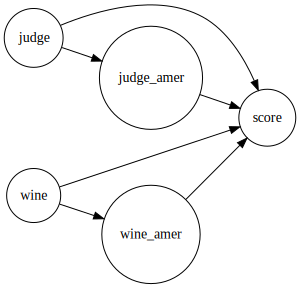

In [14]:
dag = (DAG(df)
 .add_edge("judge", "score")
 .add_edge("judge", "judge_amer")
 .add_edge("wine", "score")
 .add_edge("wine", "wine_amer")
 .add_edge("judge_amer", "score")
 .add_edge("wine_amer", "score"))

dag.plot()

Yep, this is a bug.

In [20]:
from pprint import pprint 

for i,j in zip([0,0,1,1], [0,1,0,1]):
    pprint(Query(dag).given(wine_amer=i, judge_amer=j).infer()['score'])

{1: 0.10555555555555528,
 2: 0.2444444444444434,
 3: 0.44444444444444575,
 4: 0.20555555555555477}
{1: 0.10555555555555528,
 2: 0.2444444444444434,
 3: 0.44444444444444575,
 4: 0.20555555555555477}
{1: 0.10555555555555528,
 2: 0.24444444444444338,
 3: 0.44444444444444575,
 4: 0.20555555555555477}
{1: 0.10555555555555528,
 2: 0.2444444444444434,
 3: 0.44444444444444575,
 4: 0.20555555555555477}
